# Análise de Dados Abertos


In [212]:
import pandas as pd
import numpy as np
from babel.numbers import format_compact_currency
import matplotlib.pyplot as plt
import locale
import tabulate

locale.setlocale(locale.LC_ALL, "pt_BR")
plt.style.use("default")
excelsheet = "../data/criptoativos_dados_abertos_07082023.xls"

# Carrega a planilha excel
with pd.ExcelFile(excelsheet) as xls:
    df1 = pd.read_excel(
        xls,
        "Relatorio1",
        skiprows=9,
        decimal=",",
        parse_dates=[0],
        date_format="%B de %Y",
        usecols=[0, 3, 6, 7, 8],
    )
    df2 = pd.read_excel(
        xls,
        "Relatorio2",
        skiprows=5,
        parse_dates=[0],
        date_format="%B de %Y",
        decimal=".",
    )
    df3 = pd.read_excel(
        xls,
        "Relatório3",
        skiprows=5,
        parse_dates=[0],
        date_format="%B de %Y",
        header=[0, 1],
    )
    df4 = pd.read_excel(
        xls,
        "Relatorio4",
        skiprows=13,
        decimal=",",
        parse_dates=[1],
        date_format="%B de %Y",
    )


# Utilitários
def format_cols(data):
    return data.apply(lambda x: format_compact_currency(x, currency="BRL", locale="pt_BR", fraction_digits=2))

## Total de Valores Declarados por Ano


<Axes: title={'center': 'Valores Declarados (em milhões)'}, xlabel='Ano'>

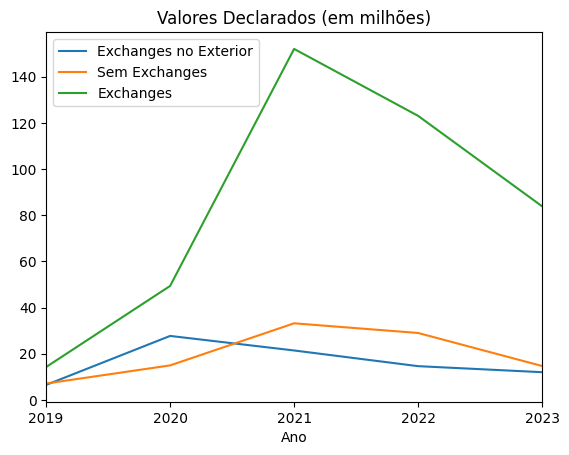

In [242]:
# Renderiza Relatório1
df1 = df1.rename(
    columns={
        "Unnamed: 0": "Ano",
        "Subtotal": "Exchanges no Exterior",
        "Subtotal.1": "Sem Exchanges",
        "Somente PJ": "Exchanges",
        "Unnamed: 8": "Total",
    }
)

df1_new = df1.groupby(pd.Grouper(key=df1.columns[0], freq="Y")).sum()
df1_new = df1_new.apply(lambda x: x/1_000)
df1_new.plot(kind='line',y=df1_new.columns[0:3],title="Valores Declarados (em milhões)")

## Quantidade de CPF/CNPJ Únicos


In [214]:
# Renderiza Relatório2
df2_new = df2.groupby(pd.Grouper(key=df2.columns[0], freq="Y")).sum()
df2_new

,CNPJ,CPF
MÊS/ANO,,
2019-12-31,12121,680054
2020-12-31,37611,1500287
2021-12-31,78290,6030838
2022-12-31,406008,11868506
2023-12-31,409524,11432616


## Operações por gênero


<Axes: xlabel='(% Nº Operações, Masculino)', ylabel='(% Valor Operações, Masculino)'>

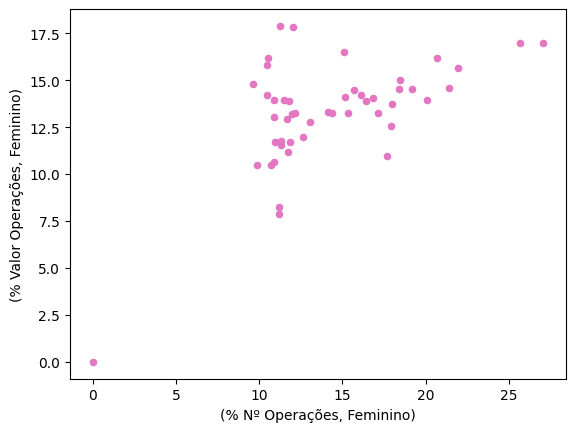

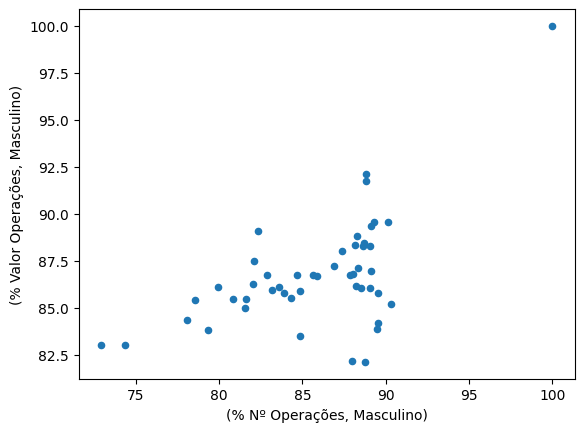

In [215]:
# Renderiza Relatório3, parte 1
# Não vai ser possível unir os dados, já que são porcentagens!\
# df3.info()
df3.plot(kind='scatter',x=df3.columns[1], y=df3.columns[3], c='tab:pink')
df3.plot(kind='scatter',x=df3.columns[2], y=df3.columns[4], c='tab:blue')

# df3['% Nº Operações','Feminino'].corr(df3['% Valor Operações','Feminino'])

## Criptoativos Declarados


In [240]:
# Renderiza Relatório 4
# https://stackoverflow.com/questions/39922986/how-do-i-pandas-group-by-to-get-sum
# https://pbpython.com/pandas-grouper-agg.html
df4_new = df4.groupby([pd.Grouper(key='MÊS/ANO', freq='Y'),"CRIPTOATIVO"])["VALOR TOTAL DAS OPERAÇÕES"].sum()
for i in range(2019,2024):
    df4_new[str(i)] = df4_new[str(i)].apply(lambda x: x/1_000_000)

df4_new['2023'].sort_values(axis=0,ascending=False)[0:5]


CRIPTOATIVO
USDT    90505.008933
BTC      6824.201199
USDC     4220.235946
BRZ      2032.752640
ETH      1535.588167
Name: VALOR TOTAL DAS OPERAÇÕES, dtype: float64